# R*

### base imports and tuning

In [12]:
import os
from pathlib import Path
#os.chdir(Path(os.getcwd()).parents[0])

In [13]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.rcParams['figure.figsize'] = [15, 5]
EPS = 0.000001

In [14]:
import sys
import os

search_tools_path = os.path.join(os.getcwd(), 'search_tools')
if search_tools_path not in sys.path:
    sys.path.append(search_tools_path)

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### pipeline

In [16]:
from moving_ai.mai_map_reader import MaiReader, MaiMaps
from pipeline import Pipeline
from moving_ai.mai_map_visualizer import VisualizeMaiMap, VisualizeMaiMapGif

from algorithms.astar_heuristics import diagonal_dist
from algorithms.rstar import Rstar
from algorithms.wastar import WAstar
from algorithms.astar import Astar

In [17]:
def moscow_map_reader():
    i = 6
    starts = [(13, 113), (476, 148), (172, 167), (226, 191), (36, 181), (302, 103), (107, 377), (438, 277), (11, 118)]
    goals = [(86, 461), (412, 100), (105, 253), (189, 2), (228, 51), (64, 31), (231, 70), (123, 5), (76, 79)]
    map_reader_0 = MaiReader(MaiMaps.MOSCOW)
    selected_task_callback = lambda t: t.start_c == starts[i] and t.goal_c == goals[i]
    selected_task = filter(selected_task_callback, map_reader_0.read_tasks()).__next__()
    return map_reader_0.with_task(selected_task)

map_reader = moscow_map_reader()

In [18]:
algorithms = [
    Astar(diagonal_dist),
    WAstar(diagonal_dist, 3),
    Rstar(diagonal_dist, D=8, K=4, w=2, exp_coeff=3),
]

p = Pipeline(
    reader=map_reader,
    algorithms=algorithms,
    processor=VisualizeMaiMap()
)

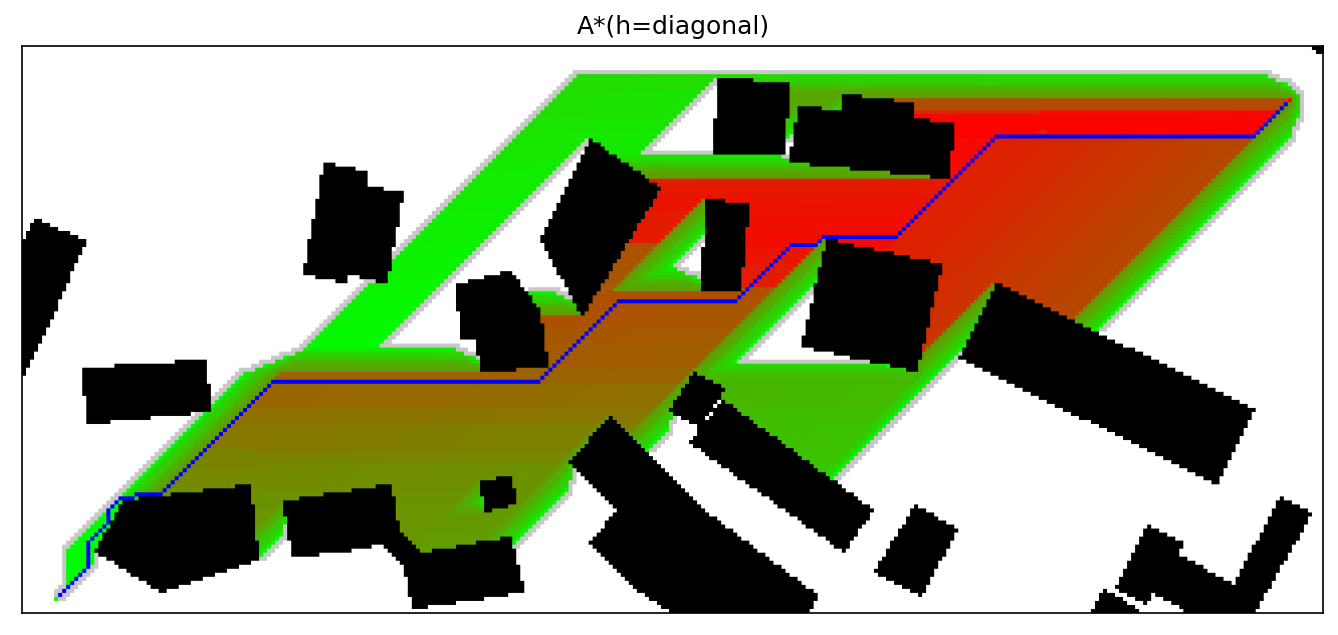

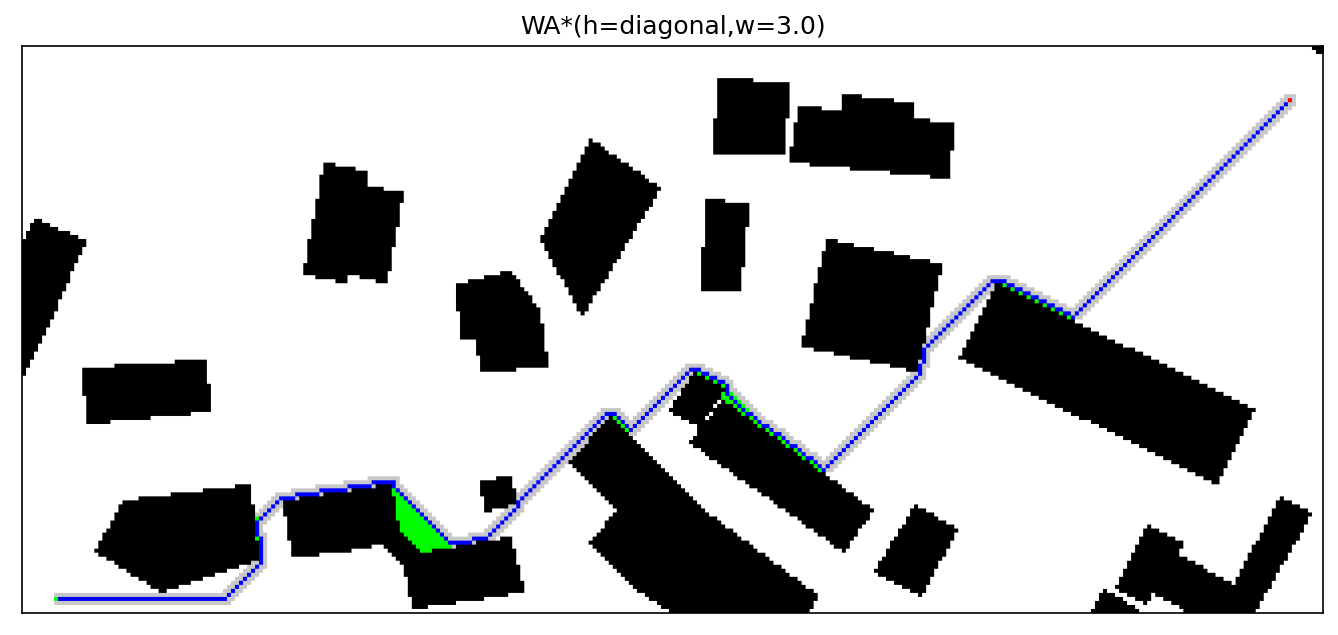

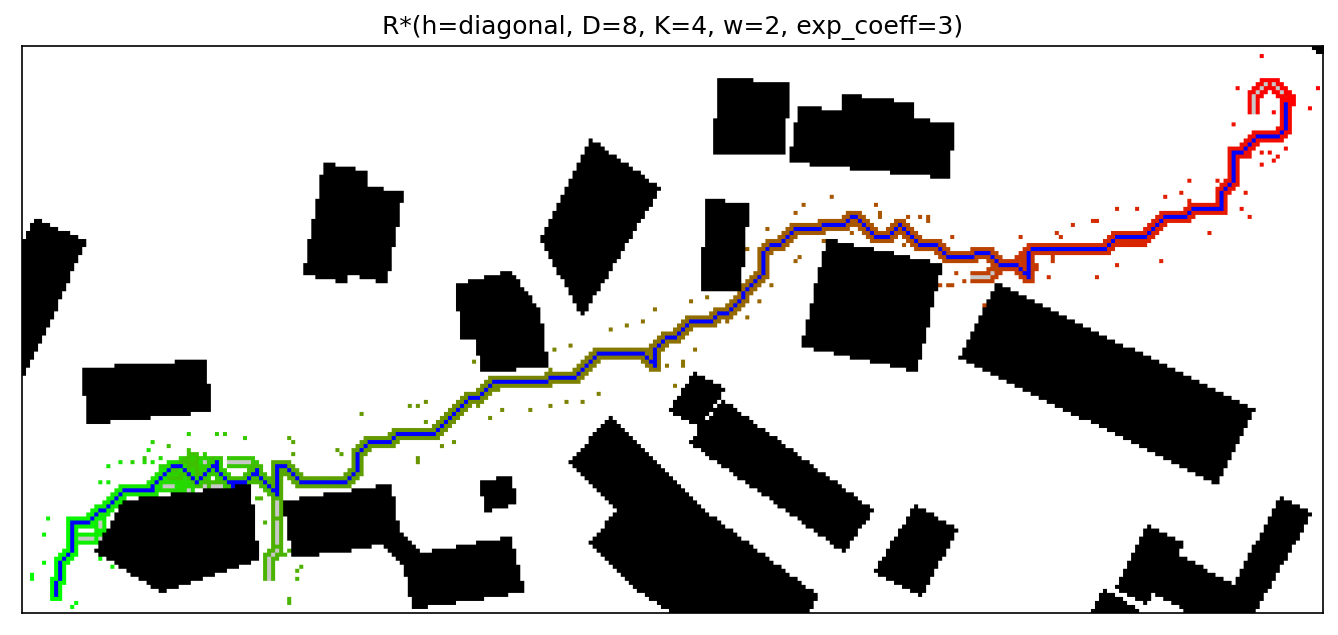

In [19]:
p.run()

In [ ]:
p.with_processor(VisualizeMaiMapGif()).run()